In [37]:
# ******************************************************************************
# W207 Project
# EDA for Derby Horse Racing data from kaggle.com
# ******************************************************************************
# Dataset:
# nyra_start_table [14914x8] ... horse/jockey race data including
#                                 odds and position at finish
# nyra_race_table [2000x10] ... race data, track conditions, distance
#
# key_id between the 2 tables: track_id, race_date, race_number
#
# ******************************************************************************

import csv

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files

upload = files.upload()

Saving nyra_race_table.csv to nyra_race_table (1).csv
Saving nyra_start_table.csv to nyra_start_table (1).csv


In [4]:
def read_csv_file(fname):
    # Add code to perform filtering and cleaning
    df = pd.read_csv(fname)
    return df

In [38]:
# kaggle dataset data file paths and file names

race_table_fname = 'nyra_race_table.csv'
start_table_fname = "nyra_start_table.csv"

race_table_df = read_csv_file(race_table_fname)
start_table_df = read_csv_file(start_table_fname)

#print(race_table_df)
print(start_table_df)

      track_id race_date  race_number program_number  weight_carried  \
0          AQU  1/1/2019            1              1             123   
1          AQU  1/1/2019            1              2             120   
2          AQU  1/1/2019            1              3             118   
3          AQU  1/1/2019            1              4             123   
4          AQU  1/1/2019            1              5             118   
...        ...       ...          ...            ...             ...   
14910      SAR  9/2/2019           11              3             119   
14911      SAR  9/2/2019           11              4             119   
14912      SAR  9/2/2019           11              6             119   
14913      SAR  9/2/2019           11              7             119   
14914      SAR  9/2/2019           11              8             119   

                jockey  odds  position_at_finish  
0          Dylan Davis   130                   2  
1      Junior Alvarado   295     

2003
1076
505
218
204


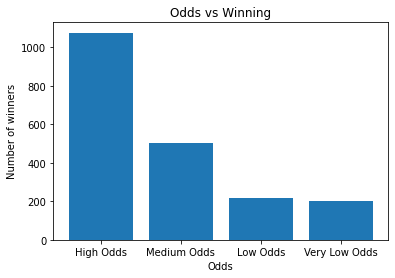

In [39]:
# Evaluate odds vs winning
start_table_df["odds_ratio"] = start_table_df["odds"] / 100
count1 = start_table_df.query("(odds_ratio < 3) and position_at_finish == 1").shape[0]
count2 = start_table_df.query("(odds_ratio >= 3 and odds_ratio < 6) and position_at_finish == 1").shape[0]
count3 = start_table_df.query("(odds_ratio >=6  and odds_ratio < 10) and position_at_finish == 1").shape[0]
count4 = start_table_df.query("(odds_ratio >= 10) and position_at_finish == 1").shape[0]

count0 = start_table_df.query("position_at_finish == 1").shape[0]

print(count0)
print(count1)
print(count2)
print(count3)
print(count4)

odds_label=['High Odds','Medium Odds','Low Odds','Very Low Odds']
winner_count =  np.array([count1,count2,count3,count4])

plt.bar(odds_label,winner_count)
plt.xlabel('Odds')
plt.ylabel('Number of winners')
plt.title('Odds vs Winning')
plt.show()

In [46]:
# Evaluate wins per jockey
df=start_table_df.where(start_table_df['position_at_finish']==1)
df = df.dropna()
df


,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position_at_finish,odds_ratio
4,AQU,1/1/2019,1.0,5,118.0,Manuel Franco,1150.0,1.0,11.50
10,AQU,1/1/2019,2.0,6,116.0,Reylu Gutierrez,340.0,1.0,3.40
14,AQU,1/1/2019,3.0,3,113.0,Benjamin Hernandez,315.0,1.0,3.15
20,AQU,1/1/2019,4.0,1,118.0,Dylan Davis,200.0,1.0,2.00
30,AQU,1/1/2019,5.0,6,123.0,Rajiv Maragh,305.0,1.0,3.05
...,...,...,...,...,...,...,...,...,...
14882,SAR,9/2/2019,7.0,2,122.0,Joel Rosario,610.0,1.0,6.10
14886,SAR,9/2/2019,8.0,1,118.0,Junior Alvarado,1210.0,1.0,12.10
14895,SAR,9/2/2019,9.0,3,122.0,Joel Rosario,310.0,1.0,3.10
14904,SAR,9/2/2019,10.0,7,120.0,Jose L. Ortiz,310.0,1.0,3.10
